In [2]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
import lightgbm as lgb

In [ ]:
trans = pd.read_csv('transactions_train.csv')
train_target = pd.read_csv('train_target.csv')
test = pd.read_csv('test.csv')

In [6]:
trans.head()

,client_id,trans_date,small_group,amount_rur
0,33172,6,4,71.463
1,33172,6,35,45.017
2,33172,8,11,13.887
3,33172,9,11,15.983
4,33172,10,11,21.341


In [10]:
trans['trans_date'].unique()

array([  6,   8,   9,  10,  11,  12,  13,  16,  17,  19,  20,  23,  24,
        25,  28,  29,  31,  32,  33,  34,  35,  37,  38,  40,  41,  42,
        43,  45,  47,  48,  49,  50,  51,  54,  55,  56,  57,  58,  59,
        61,  62,  63,  64,  68,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 163, 164, 166, 168, 169, 170, 171, 172,
       173, 174, 175, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190,
       191, 193, 194, 195, 196, 198, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 212, 227, 230, 233, 238, 240, 243, 245, 247, 248,
       249, 251, 252, 256, 261, 264, 266, 271, 277, 280, 281, 28

In [ ]:
d = pd.read_csv('small_group_description.csv')

Имеет животных: 0 49
Продукты: 1,6, 15, 47 68 125 131
Личный автомобиль: 2, 14 55 58 76 77 121 138 164 183 192 194 196
Транспорт: 5, 20, 25 60 78 95 97 107 
Спорт: 52 8 54 79 108  153 165 179 
Еда вне дома: 11 
Такси: 12 63 154 141 186
здоровье: 21,4 40 62 102 117 130 136 137 144 188 191 197 201 202
Обувь 23
Одежда 24 39 43 66 143 180 187 193
Техника 22 28 87 123 129 163
Развлечения 31 37 65 67 72 100 101 103 110 111 119 155 159 177 185
Хобби 42 48 51 56 82 88 98

Разное 32 38 41 26 46 19 99 135 146 149 150 156 157 162 172 173 175 200 80 109 124

Отели 59 181 13
биржа 147 45
книги 35 71 89
реклама 44 198
услуги 126 142 145 148 152 167 168 190 195 199 84 85 92 94 160 158 184
учеба 86 96 105 169
Есть ребенок 57 61 
Налоги 53 29 64 73
Благотворительность 74 132
суд 140 139
Для дома 50 113 114 116 118 122 127 128 134 151 161 170 171 174 178 182 189 203 69
Онлайн 16 33 17 104 115 120 91 133 166
доставка еды 106 70 75
кредиты 90 93
Вредные привычки 34 30
Женское 36 43 81 83 112
Мужское 66

без 194 и 201

In [391]:
a = [[0,49],[1,6, 15,47,68,125,131],[2, 14, 58, 76, 77, 121, 138, 164, 183, 192 ,196],[5, 20, 25, 60, 78, 95, 97, 107 ],
[52, 8 ,54, 79 ,108,  153,165 ,179 ],[11],[12, 63 ,154 ,141, 186],[21,4 ,40, 62, 102 ,117,130 ,136, 137,144 ,188, 191, 197 , 202],
[23],[24, 39, 43, 66, 143, 180,187, 193],[22, 28, 87, 123, 129,163],[31, 37, 65, 67, 72 ,100, 101, 103 ,110 ,111, 119, 155 ,159, 177, 185],
[42, 48, 51 ,56 ,82, 88, 98],[32, 38, 41 ,26, 46 ,19 ,99 ,135 ,146, 149, 150, 156, 157 ,162 ,172 ,173 ,175, 200, 80, 109, 124],
[59, 181, 13],[147, 45],[35, 71, 89],[44, 198],[126, 142, 145 ,148 ,152, 167, 168, 190, 195, 199, 84, 85, 92, 94, 160, 158, 184],
[86, 96, 105,169],[57, 61],[53, 29, 64, 73],[74, 132],[140, 139],[50, 113, 114, 116, 118, 122 ,127, 128, 134 ,151, 161, 170, 171 ,174, 178, 182, 189, 203 ,69],
[16, 33, 17,104, 115, 120, 91, 133, 166],[106,70 ,75],[90, 93],[34, 30]]

In [407]:
list(d['small_group'])[36]

'Косметика'

In [395]:
train.columns

Index(['client_id', 'bins', 'sum', 'mean', 'std', 'min', 'max', 'count',
       'small_group_3', 'small_group_7', 'small_group_9', 'small_group_10',
       'small_group_18', 'small_group_27', 'small_group_36', 'small_group_55',
       'small_group_81', 'small_group_83', 'small_group_112',
       'small_group_176', 'Животные', 'Продукты', 'Автомобиль', 'Транспорт',
       'Спорт', 'Еда', 'Такси', 'Здоровье', 'Обувь', 'Одежда', 'Техника',
       'Развлечения', 'Хобби', 'Разное', 'Отели', 'Биржа', 'Книги', 'Реклама',
       'Услуги', 'Учеба', 'Ребенок', 'Налоги', 'Благотворительность', 'Суд',
       'Для дома', 'Онлайн', 'Доставка', 'Кредиты', 'Вредные привычки'],
      dtype='object')

In [1]:
agg_features=trans.groupby('client_id')['amount_rur'].agg(['sum','mean','std','min','max','count']).reset_index()
counter_df_train=trans.groupby(['client_id','small_group'])['amount_rur'].count()
cc = trans.groupby(['client_id','small_group'])['amount_rur'].sum()
cat_counts_train=counter_df_train.reset_index().pivot(index='client_id', \
                                                     columns='small_group',values='amount_rur')
cc_tr = cc.reset_index().pivot(index='client_id', \
                                                      columns='small_group',values='amount_rur')
cat_counts_train=cat_counts_train.fillna(0)
cc_tr = cc_tr.fillna(0)
cat_counts_train.columns=['small_group_'+str(i) for i in cat_counts_train.columns]
cc_tr.columns = ['small_group_'+str(i)+'rur' for i in cc_tr.columns]
#data = pd.DataFrame()
#for i,j in zip(cc_tr.columns, cat_counts_train.columns):
#    data[j]= cc_tr[i]/cat_counts_train[j]
#data = data.fillna(0)
train=pd.merge(train_target,agg_features,on='client_id')
train=pd.merge(train,cat_counts_train.reset_index(),on='client_id')
train=pd.merge(train,cc_tr.reset_index(),on='client_id')

NameError: name 'trans' is not defined

In [ ]:
for i,j in zip(['Животные', 'Продукты','Автомобиль', 'Транспорт', "Спорт", "Еда","Такси","Здоровье", "Обувь","Одежда","Техника","Развлечения","Хобби", "Разное", "Отели", "Биржа", "Книги", "Реклама", "Услуги", "Учеба","Ребенок","Налоги","Благотворительность", "Суд", "Для дома", "Онлайн", "Доставка", "Кредиты", "Вредные привычки"],a):
    for r in j:
        train[i] = train[f'small_group_{r}'] if j[0]==r else train[f'small_group_{r}']+train[i]
        train = train.drop(columns=[f'small_group_{r}'])

In [427]:
for column in train.columns[8:]:
    train[column]/=train['count']
    #train[column]/=train['sum']

In [428]:
y = train.bins
tr = train.drop(columns = ['bins']).set_index('client_id')

In [435]:
tr['count'].min()

700

In [429]:
tr.head()

,sum,mean,std,min,max,count,small_group_0rur,small_group_1rur,small_group_2rur,small_group_3rur,...,small_group_192rur,small_group_193rur,small_group_195rur,small_group_196rur,small_group_197rur,small_group_198rur,small_group_199rur,small_group_200rur,small_group_202rur,small_group_203rur
client_id,,,,,,,,,,,,,,,,,,,,,
24662,30254.011,34.774725,72.037354,0.074,1227.314,870,0.000000,0.234476,0.002119,0.046704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,42548.570,52.015367,106.540962,0.550,1210.506,818,0.002241,0.256666,0.087248,0.014274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34089,26842.816,34.325852,59.927450,0.043,782.641,782,0.000000,0.371404,0.000000,0.029620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34848,15773.126,16.160990,14.224936,0.043,109.590,976,0.000000,0.506290,0.000046,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47076,12488.375,15.929050,35.473591,0.432,541.165,784,0.000000,0.312884,0.000000,0.305971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [430]:
train_train,val_train, train_test, val_test = train_test_split(tr,y)

In [404]:
params = { 'n_estimators':1000,
          "objective" : "multiclass",
          "n_classes" : 4,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }

model = lgb.LGBMClassifier(**params)
model.fit(train_train,train_test)
y_pred = model.predict(val_train)

In [431]:
params ={'classes_count':4,'iterations':500, 'max_depth':7, 'learning_rate':0.05, 'loss_function' :'MultiClass', 'eval_metric':'Accuracy'}
model = CatBoostClassifier(**params)
model.fit(train_train,train_test)
y_pred = model.predict(val_train)

0:	learn: 0.5012000	total: 5.02s	remaining: 41m 44s
1:	learn: 0.5147556	total: 9.71s	remaining: 40m 16s
2:	learn: 0.5286222	total: 14.2s	remaining: 39m 12s
3:	learn: 0.5428000	total: 18.9s	remaining: 39m
4:	learn: 0.5435556	total: 23.3s	remaining: 38m 28s
5:	learn: 0.5433778	total: 27.8s	remaining: 38m 6s
6:	learn: 0.5440889	total: 32.1s	remaining: 37m 43s
7:	learn: 0.5466222	total: 36.7s	remaining: 37m 37s
8:	learn: 0.5452000	total: 41.3s	remaining: 37m 31s
9:	learn: 0.5475111	total: 45.9s	remaining: 37m 28s
10:	learn: 0.5505778	total: 50.5s	remaining: 37m 25s
11:	learn: 0.5514222	total: 55.3s	remaining: 37m 27s
12:	learn: 0.5550222	total: 59.8s	remaining: 37m 20s
13:	learn: 0.5551556	total: 1m 4s	remaining: 37m 3s
14:	learn: 0.5579111	total: 1m 8s	remaining: 36m 59s
15:	learn: 0.5587556	total: 1m 13s	remaining: 36m 54s
16:	learn: 0.5591111	total: 1m 17s	remaining: 36m 46s
17:	learn: 0.5600000	total: 1m 22s	remaining: 36m 41s
18:	learn: 0.5622222	total: 1m 26s	remaining: 36m 32s
19:	l

152:	learn: 0.6335556	total: 11m 44s	remaining: 26m 37s
153:	learn: 0.6331111	total: 11m 49s	remaining: 26m 33s
154:	learn: 0.6341778	total: 11m 53s	remaining: 26m 28s
155:	learn: 0.6344444	total: 11m 57s	remaining: 26m 23s
156:	learn: 0.6347556	total: 12m 2s	remaining: 26m 18s
157:	learn: 0.6354667	total: 12m 7s	remaining: 26m 14s
158:	learn: 0.6352889	total: 12m 11s	remaining: 26m 9s
159:	learn: 0.6358667	total: 12m 16s	remaining: 26m 4s
160:	learn: 0.6363556	total: 12m 21s	remaining: 26m
161:	learn: 0.6365333	total: 12m 26s	remaining: 25m 57s
162:	learn: 0.6367556	total: 12m 30s	remaining: 25m 51s
163:	learn: 0.6363111	total: 12m 35s	remaining: 25m 46s
164:	learn: 0.6362667	total: 12m 39s	remaining: 25m 41s
165:	learn: 0.6364889	total: 12m 44s	remaining: 25m 37s
166:	learn: 0.6376889	total: 12m 48s	remaining: 25m 32s
167:	learn: 0.6380000	total: 12m 53s	remaining: 25m 27s
168:	learn: 0.6385778	total: 12m 57s	remaining: 25m 23s
169:	learn: 0.6384889	total: 13m 2s	remaining: 25m 18s
1

300:	learn: 0.6703556	total: 22m 46s	remaining: 15m 3s
301:	learn: 0.6707111	total: 22m 50s	remaining: 14m 58s
302:	learn: 0.6705778	total: 22m 55s	remaining: 14m 53s
303:	learn: 0.6706222	total: 22m 59s	remaining: 14m 49s
304:	learn: 0.6712889	total: 23m 3s	remaining: 14m 44s
305:	learn: 0.6713778	total: 23m 8s	remaining: 14m 40s
306:	learn: 0.6717778	total: 23m 12s	remaining: 14m 35s
307:	learn: 0.6720000	total: 23m 16s	remaining: 14m 30s
308:	learn: 0.6717333	total: 23m 20s	remaining: 14m 25s
309:	learn: 0.6718222	total: 23m 25s	remaining: 14m 21s
310:	learn: 0.6721778	total: 23m 29s	remaining: 14m 16s
311:	learn: 0.6723556	total: 23m 34s	remaining: 14m 12s
312:	learn: 0.6723556	total: 23m 38s	remaining: 14m 7s
313:	learn: 0.6728889	total: 23m 43s	remaining: 14m 3s
314:	learn: 0.6729778	total: 23m 47s	remaining: 13m 58s
315:	learn: 0.6734222	total: 23m 51s	remaining: 13m 53s
316:	learn: 0.6737333	total: 23m 56s	remaining: 13m 49s
317:	learn: 0.6742222	total: 24m	remaining: 13m 44s
3

449:	learn: 0.6936444	total: 33m 37s	remaining: 3m 44s
450:	learn: 0.6936889	total: 33m 42s	remaining: 3m 39s
451:	learn: 0.6940444	total: 33m 48s	remaining: 3m 35s
452:	learn: 0.6939111	total: 33m 52s	remaining: 3m 30s
453:	learn: 0.6938667	total: 33m 57s	remaining: 3m 26s
454:	learn: 0.6939111	total: 34m 1s	remaining: 3m 21s
455:	learn: 0.6938667	total: 34m 5s	remaining: 3m 17s
456:	learn: 0.6939556	total: 34m 9s	remaining: 3m 12s
457:	learn: 0.6943111	total: 34m 14s	remaining: 3m 8s
458:	learn: 0.6946222	total: 34m 19s	remaining: 3m 3s
459:	learn: 0.6944444	total: 34m 24s	remaining: 2m 59s
460:	learn: 0.6951111	total: 34m 28s	remaining: 2m 55s
461:	learn: 0.6951556	total: 34m 33s	remaining: 2m 50s
462:	learn: 0.6953333	total: 34m 38s	remaining: 2m 46s
463:	learn: 0.6953333	total: 34m 43s	remaining: 2m 41s
464:	learn: 0.6953333	total: 34m 48s	remaining: 2m 37s
465:	learn: 0.6953778	total: 34m 53s	remaining: 2m 32s
466:	learn: 0.6954667	total: 34m 57s	remaining: 2m 28s
467:	learn: 0.6

In [432]:
from sklearn.metrics import accuracy_score
accuracy_score(val_test, y_pred)

0.6109333333333333

In [421]:
tr = tr.drop(columns=df_importances[df_importances['importances']<=0.001].index)

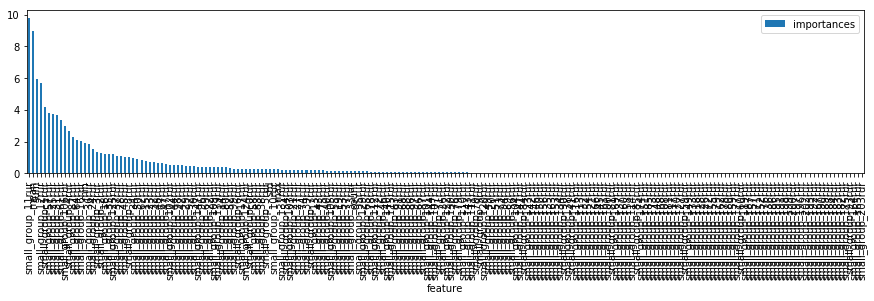

,importances
feature,
small_group_11rur,9.808128
mean,8.959740
sum,5.952205
small_group_12rur,5.669450
small_group_1rur,4.166553


In [433]:
df_importances = pd.DataFrame(data = {'feature':train_train.columns,'importances':model.feature_importances_})
df_importances.sort_values(by=['importances'],inplace=True,ascending=False)
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()
display(df_importances.head())

In [436]:
df_importances

,importances
feature,
small_group_11rur,9.808128
mean,8.959740
sum,5.952205
small_group_12rur,5.669450
small_group_1rur,4.166553
small_group_57rur,3.802166
small_group_25rur,3.708157
small_group_31rur,3.703469
small_group_61rur,3.360325


In [19]:
transactions_test=pd.read_csv('transactions_test.csv')

test_id=pd.read_csv('test.csv')

In [20]:
agg_features_test=transactions_test.groupby('client_id')['amount_rur'].agg(['sum','mean','std','min','max']).reset_index()
counter_df_test=transactions_test.groupby(['client_id','small_group'])['amount_rur'].count()
cat_counts_test=counter_df_test.reset_index().pivot(index='client_id', columns='small_group',values='amount_rur')
cat_counts_test=cat_counts_test.fillna(0)
cat_counts_test.columns=['small_group_'+str(i) for i in cat_counts_test.columns]
test=pd.merge(test_id,agg_features_test,on='client_id')
test=pd.merge(test,cat_counts_test.reset_index(),on='client_id')

In [21]:
common_features=list(set(tr.columns).intersection(set(test.columns)))

In [23]:
X_train=tr[common_features]
X_test=test[common_features]

In [56]:
params ={'classes_count':4, 'iterations':300}
model = CatBoostClassifier(**params)
model.fit(X_train,y)
y_pred = model.predict(X_test)

0:	learn: -1.3697571	total: 219ms	remaining: 1m 5s
1:	learn: -1.3538516	total: 391ms	remaining: 58.3s
2:	learn: -1.3384580	total: 596ms	remaining: 59s
3:	learn: -1.3249053	total: 803ms	remaining: 59.4s
4:	learn: -1.3109390	total: 974ms	remaining: 57.5s
5:	learn: -1.2992014	total: 1.14s	remaining: 55.7s
6:	learn: -1.2875409	total: 1.31s	remaining: 54.8s
7:	learn: -1.2765393	total: 1.49s	remaining: 54.3s
8:	learn: -1.2667477	total: 1.65s	remaining: 53.4s
9:	learn: -1.2567552	total: 1.83s	remaining: 53s
10:	learn: -1.2474215	total: 2s	remaining: 52.5s
11:	learn: -1.2380229	total: 2.17s	remaining: 52.1s
12:	learn: -1.2293022	total: 2.34s	remaining: 51.7s
13:	learn: -1.2207612	total: 2.51s	remaining: 51.3s
14:	learn: -1.2126573	total: 2.67s	remaining: 50.8s
15:	learn: -1.2052915	total: 2.85s	remaining: 50.5s
16:	learn: -1.1987450	total: 3.01s	remaining: 50.1s
17:	learn: -1.1914393	total: 3.17s	remaining: 49.7s
18:	learn: -1.1843397	total: 3.34s	remaining: 49.4s
19:	learn: -1.1777310	total: 

159:	learn: -0.9267512	total: 26.8s	remaining: 23.4s
160:	learn: -0.9262781	total: 26.9s	remaining: 23.2s
161:	learn: -0.9257237	total: 27.1s	remaining: 23.1s
162:	learn: -0.9252710	total: 27.2s	remaining: 22.9s
163:	learn: -0.9248827	total: 27.3s	remaining: 22.7s
164:	learn: -0.9245547	total: 27.5s	remaining: 22.5s
165:	learn: -0.9239630	total: 27.7s	remaining: 22.3s
166:	learn: -0.9234772	total: 27.8s	remaining: 22.1s
167:	learn: -0.9229684	total: 28s	remaining: 22s
168:	learn: -0.9224797	total: 28.1s	remaining: 21.8s
169:	learn: -0.9218901	total: 28.3s	remaining: 21.6s
170:	learn: -0.9214476	total: 28.4s	remaining: 21.4s
171:	learn: -0.9209299	total: 28.6s	remaining: 21.2s
172:	learn: -0.9204609	total: 28.7s	remaining: 21.1s
173:	learn: -0.9198933	total: 28.9s	remaining: 20.9s
174:	learn: -0.9193207	total: 29s	remaining: 20.7s
175:	learn: -0.9187997	total: 29.2s	remaining: 20.6s
176:	learn: -0.9183033	total: 29.4s	remaining: 20.4s
177:	learn: -0.9178276	total: 29.6s	remaining: 20.3s

In [57]:
y_pred = list(map(int, y_pred.T[0].T))
y_pred

[0,
 2,
 3,
 2,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 3,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 1,
 2,
 3,
 0,
 2,
 2,
 2,
 0,
 2,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 1,
 0,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 0,
 1,
 2,
 1,
 0,
 3,
 3,
 1,
 0,
 0,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 3,
 0,
 0,
 0,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 1,
 0,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 0,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 0,
 1,
 3,
 2,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 0,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 2,
 0,
 1,
 3,
 0,
 1,
 3,
 0,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 3,
 3,
 2,
 1,
 3,
 2,
 1,
 0,
 0,
 2,
 2,
 3,
 1,


In [58]:
submission = pd.DataFrame({'bins': y_pred}, index=test.client_id)
submission.head()

,bins
client_id,
28571,0
27046,2
13240,3
19974,2
10505,1


In [61]:
submission.to_csv('submission.csv', index=True)